# How is the infection rate affected by public activity?

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;From the very beggining of this internship, one of the most pressing questions was prompted with was how has recent public activity affected the COVID 19 infection rate? Have the recent protests caused a spike in infections? Are government stay at home ordes actually slowing down the virus? Can counties open up buisnesses without endangering public health? Investigating these questions requires a method of inspecting county infection rate. Using the graphs I produced in chapter 3.6, and public records of COVID 19 updates for Miami-Dade and LA county, I searched for a corelation between public activity and changes in infection rate.   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Defining what constitutes as causation, rather than correlation, is important in determining whether or not these public events cause spikes or declines in infection rate. On average, COVID 19 has a two week incubation period. So, if a group of people were all exposed to the virus on the same day, I would expect a spike in infections roughly 2 weeks later. In the event that a group of people were not all exposed on the same day, rather, over a range of possible days, I would expect a distict but gradual increase in the case rate, beggining two weeks later. 

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
from functions import calculate_infection, detection_plot, clean_deaths, clean_cases
from scipy.optimize import curve_fit

In [2]:
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
deaths_df = clean_deaths(deaths_df)

deaths_df_HR = deaths_df.iloc[362,:]
deaths_df_HR = deaths_df_HR.reset_index()

index_val = len(deaths_df_HR.index)

calculate_infection(deaths_df_HR, index_val)
deaths_df_HR = deaths_df_HR[0:-18]

index_val = len(deaths_df_HR.index)

In [5]:
def logistic(x, midpoint=0, rate=.8, maximum=1):
    return maximum / (1 + np.exp(-rate * (x - midpoint)))

x = np.linspace(-6, 10, 1000)
y = logistic(x)# + logistic(x, midpoint=6, rate=2, maximum=5)



def double_log(x, x1, r1, m1, x2, r2, m2):
    return logistic(x, x1, r1, m1) + logistic(x, x2, r2, m2)


popt1, _ = curve_fit(logistic, range(0, index_val),  deaths_df_HR['total_infections'], p0=[0,0,0], maxfev = 5000)

popt2, _ = curve_fit(double_log, range(0, index_val), deaths_df_HR['total_infections'], p0=[0,0,0,0,0,0])

xmodel = np.linspace(0, index_val, index_val)
ymodel1 = logistic(xmodel, *popt1)

ymodel2 = double_log(xmodel, *popt2)

first_derivative = np.gradient(ymodel2)
second_derivative = np.gradient(first_derivative)



# Miami-Dade's infection rate by day

([<matplotlib.axis.XTick at 0x1222fedd0>,
 <a list of 8 Text major ticklabel objects>)

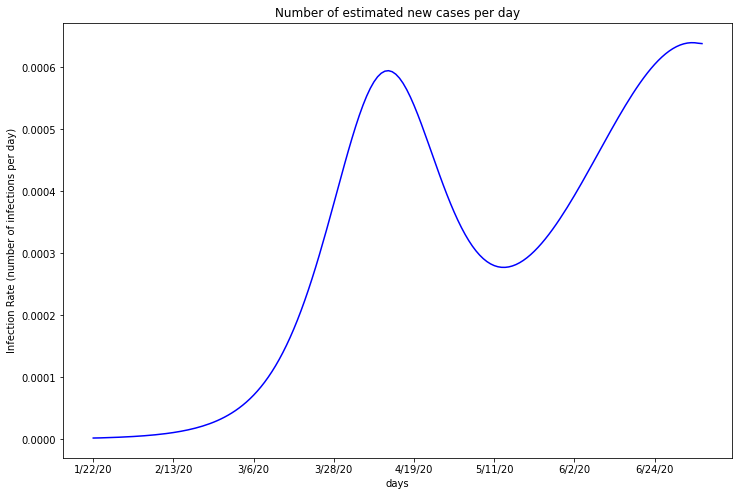

In [6]:
plt.figure(figsize=(12,8))
plt.plot(deaths_df_HR['index'], first_derivative / 2716940, color='blue', label='death rate cases')
plt.xlabel('days')
plt.ylabel('Infection Rate (number of infections per day)')
plt.title('Number of estimated new cases per day')
plt.xticks(np.arange(0, 166, step=22)) 